# Intro

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("heart.csv")

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Explore

<Axes: xlabel='age', ylabel='count'>

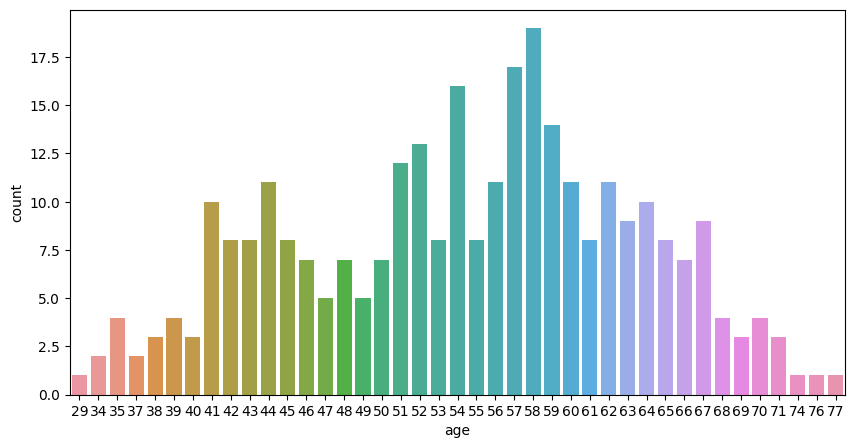

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x='age',data=df)

<Axes: xlabel='sex', ylabel='count'>

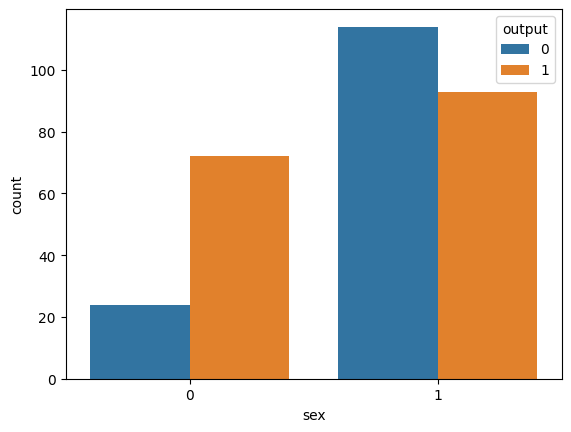

In [10]:
sns.countplot(data=df,x='sex',hue='output')

<Axes: xlabel='output', ylabel='count'>

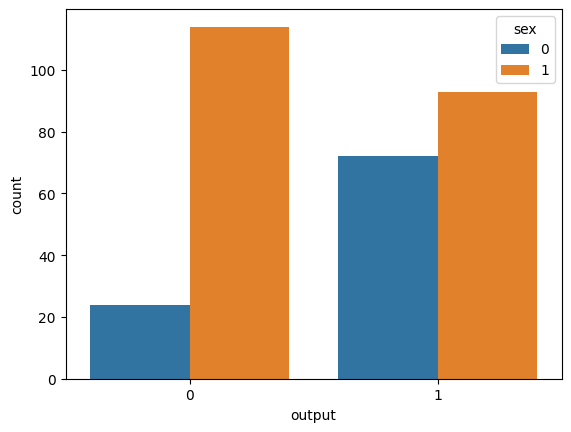

In [11]:
sns.countplot(data=df,x='output',hue='sex')

In [12]:
heart_attack=df[df['output']==1]
heart_attack

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


<Axes: xlabel='age', ylabel='count'>

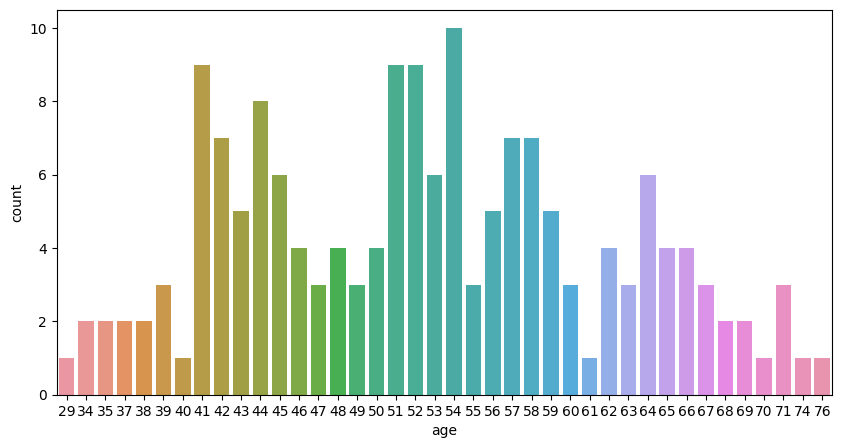

In [13]:
# People died from heart attack depends on age in a following bar diagram
plt.figure(figsize=(10,5))
sns.countplot(x='age',data=heart_attack)

<Axes: xlabel='age', ylabel='count'>

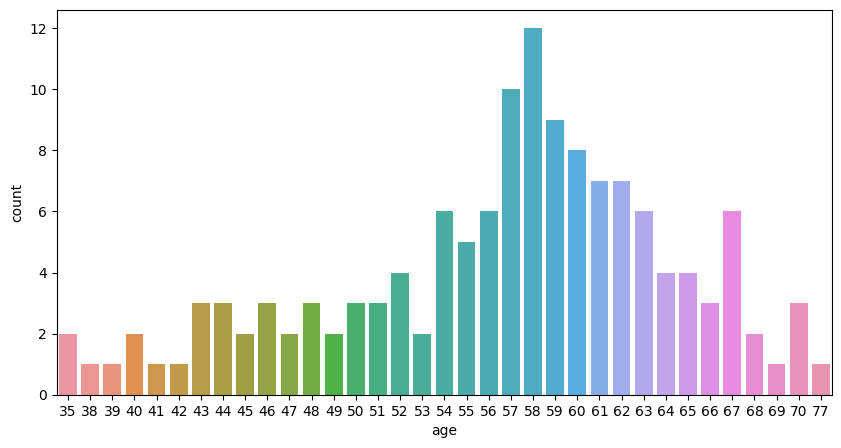

In [14]:
# people who haven't died of ages in a given bar diagram
plt.figure(figsize=(10,5))
sns.countplot(x='age',data=df[df['output']==0])

([<matplotlib.patches.Wedge at 0x172d5d3b410>,
 [Text(0.09681809669550348, 1.0957309232435946, '0'),
  Text(-0.8227797907748032, -0.730091375029572, '2'),
  Text(0.5986246155747549, -0.9228480750524309, '1'),
  Text(1.0688703878101182, -0.2598385923273283, '3')],
 [Text(0.052809870924820076, 0.5976714126783242, '47.2%'),
  Text(-0.44878897678625623, -0.3982316591070392, '28.7%'),
  Text(0.3265225175862299, -0.5033716773013259, '16.5%'),
  Text(0.5830202115327917, -0.14173014126945177, '7.6%')])

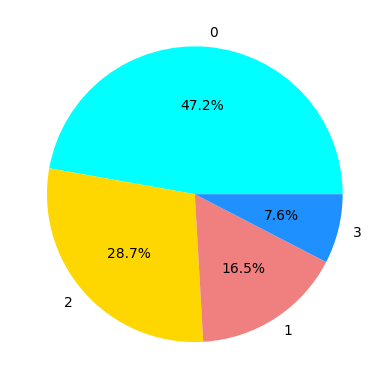

In [15]:
plt.pie(df.cp.value_counts(),labels=df.cp.value_counts().index,autopct='%1.1f%%',colors=['aqua', 'gold', 'lightcoral', 'dodgerblue'])

(array([10., 42., 67., 74., 57., 27., 13.,  8.,  3.,  2.]),
 array([ 94. , 104.6, 115.2, 125.8, 136.4, 147. , 157.6, 168.2, 178.8,
        189.4, 200. ]),
 <BarContainer object of 10 artists>)

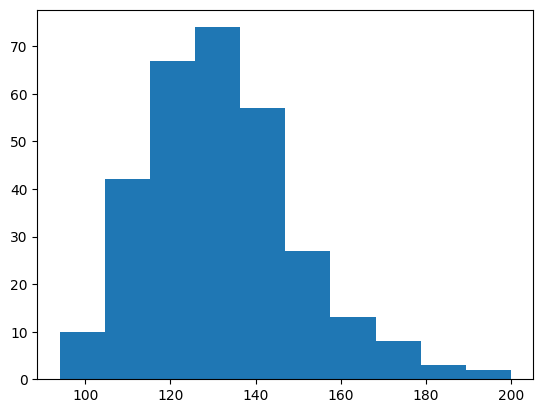

In [16]:
# Distribution of resting blood pressure
plt.hist(df['trtbps'])

{'whiskers': [<matplotlib.lines.Line2D at 0x172d5e50790>,
 'caps': [<matplotlib.lines.Line2D at 0x172d5e51e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x172d5e0ccd0>],
 'medians': [<matplotlib.lines.Line2D at 0x172d5e534d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x172d5d4bbd0>],
 'means': []}

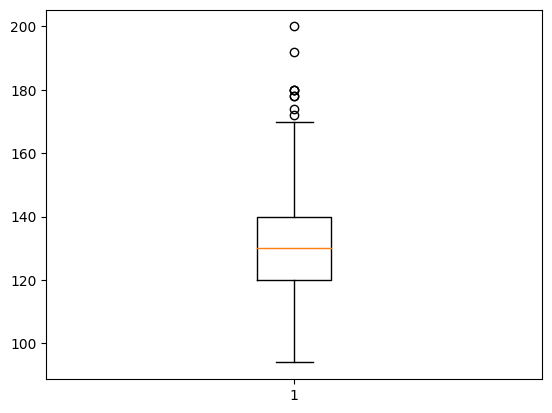

In [17]:
plt.boxplot(df['trtbps'])

(array([ 12.,  73., 106.,  69.,  35.,   3.,   4.,   0.,   0.,   1.]),
 array([126. , 169.8, 213.6, 257.4, 301.2, 345. , 388.8, 432.6, 476.4,
        520.2, 564. ]),
 <BarContainer object of 10 artists>)

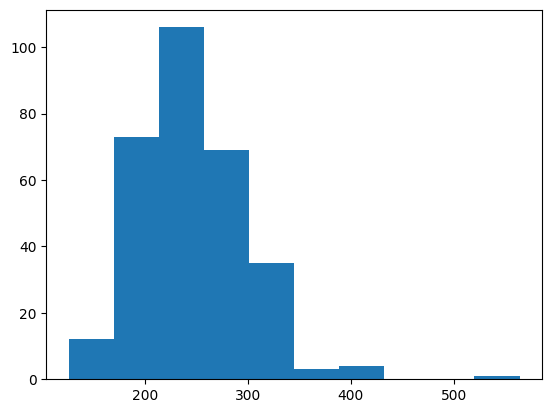

In [18]:
# Distribution of cholestrol
plt.hist(df['chol'])

{'whiskers': [<matplotlib.lines.Line2D at 0x172d6423c10>,
 'caps': [<matplotlib.lines.Line2D at 0x172d642d0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x172d5eaf3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x172d642e750>],
 'fliers': [<matplotlib.lines.Line2D at 0x172d6423b50>],
 'means': []}

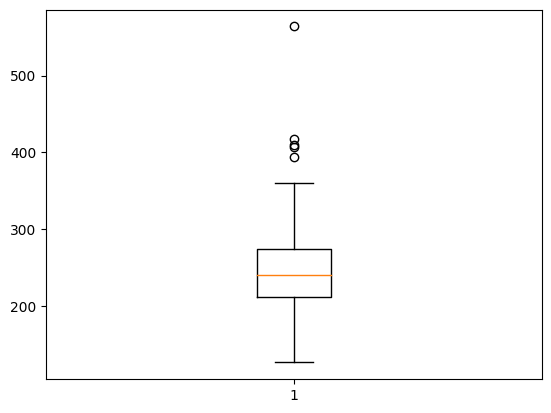

In [19]:
plt.boxplot(df['chol'])

# Splitting

In [20]:
X=df.drop(['output'],axis=1)

In [21]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
y=df['output']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# Models

## Decision Tree Regressor

In [25]:
from sklearn.tree import DecisionTreeRegressor
d_model=DecisionTreeRegressor()
d_model.fit(X_train,y_train)
pred1=d_model.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,pred1))
print(d_model.score(X_test,y_test))

0.2459016393442623
0.0032679738562092497


## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
r_model=LogisticRegression()
r_model.fit(X_train,y_train)
pred2=r_model.predict(X_test)

In [31]:
print(mean_absolute_error(y_test,pred2))
print(r_model.score(X_test,y_test))

0.14754098360655737
0.8524590163934426


## Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
l_model=LinearRegression()
l_model.fit(X_train,y_train)
pred3=l_model.predict(X_test)

In [34]:
print(mean_absolute_error(y_test,pred3))
print(l_model.score(X_test,y_test))

0.29813617360431016
0.4690443546615132


## Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor
f_model=RandomForestRegressor(n_estimators=100)
f_model.fit(X_train,y_train)
pred4=f_model.predict(X_test)

In [36]:
print(mean_absolute_error(y_test,pred4))
print(f_model.score(X_test,y_test))

0.24131147540983605
0.5477228758169934


Here Logistic regression is the best